<div style="background-color: #e8f4fd; border-left: 5px solid #2196F3; padding: 10px; font-family: Arial;">
  <strong>Import Necessary Libraries:</strong> Essential Python libraries are imported for data manipulation, analysis, and visualization.
</div>


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from ydata_profiling import ProfileReport
from ydata_profiling.config import Settings

In [2]:
# Read the cleaned dataset 
df = pd.read_csv('../Data/cleaned_sports_data.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'MP',
       'Starts', 'Min', 'MinutesPer90', 'Goals', 'Assists', 'GoalsAndAssists',
       'NonPenaltyGoals', 'PenaltiesScored', 'PenaltiesAttempted', 'CrdY',
       'CrdR', 'ExpGoals', 'NPExpGoals', 'ExpAssists', 'NPExpGoalsAndAssists',
       'PrgC', 'PrgP', 'PrgR', 'GoalsPer90', 'AssistsPer90',
       'GoalsAndAssistsPer90', 'NPGoalsPer90', 'NPGoalsAndAssistsPer90',
       'ExpGoalsPer90', 'ExpAssistsPer90', 'ExpGoalsAndAssistsPer90',
       'NPExpGoalsPer90', 'NPExpGoalsAndAssistsPer90'],
      dtype='object')

In [4]:
# remove unnecessary column
df.drop(columns=['Unnamed: 0'],inplace=True)

In [5]:
# Display all columns in the DataFrame output without truncation
pd.set_option('display.max_columns', None)

In [6]:
df.head(3)

,Player,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,MinutesPer90,Goals,Assists,GoalsAndAssists,NonPenaltyGoals,PenaltiesScored,PenaltiesAttempted,CrdY,CrdR,ExpGoals,NPExpGoals,ExpAssists,NPExpGoalsAndAssists,PrgC,PrgP,PrgR,GoalsPer90,AssistsPer90,GoalsAndAssistsPer90,NPGoalsPer90,NPGoalsAndAssistsPer90,ExpGoalsPer90,ExpAssistsPer90,ExpGoalsAndAssistsPer90,NPExpGoalsPer90,NPExpGoalsAndAssistsPer90
0,Aaron Ciammaglichella,ITA,MF,Torino,Serie A,19,1,0,1,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
1,Aaron Cresswell,ENG,DF,West Ham,Premier League,34,18,10,824,9.2,0,0,0,0,0,0,3,0,0.2,0.2,1.3,1.6,6,36,4,0.0,0.0,0.0,0.0,0.0,0.03,0.15,0.17,0.03,0.17
2,Aaron Malouda,FRA,FW,Lille,Ligue 1,18,1,0,2,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00


In [7]:
# Disable chi-squared Because chi-square comparisons on some columns (especially categorical columns with float or very few values) 
config = Settings()
config.vars.num.chi_squared_threshold = 0.0  

# Create the profile report using the cleaned dataset
profile = ProfileReport(df, title="Sports Data Profile Report", explorative=True, config=config)

# Save the full profiling report to an HTML file
profile.to_file("sports_profile_report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

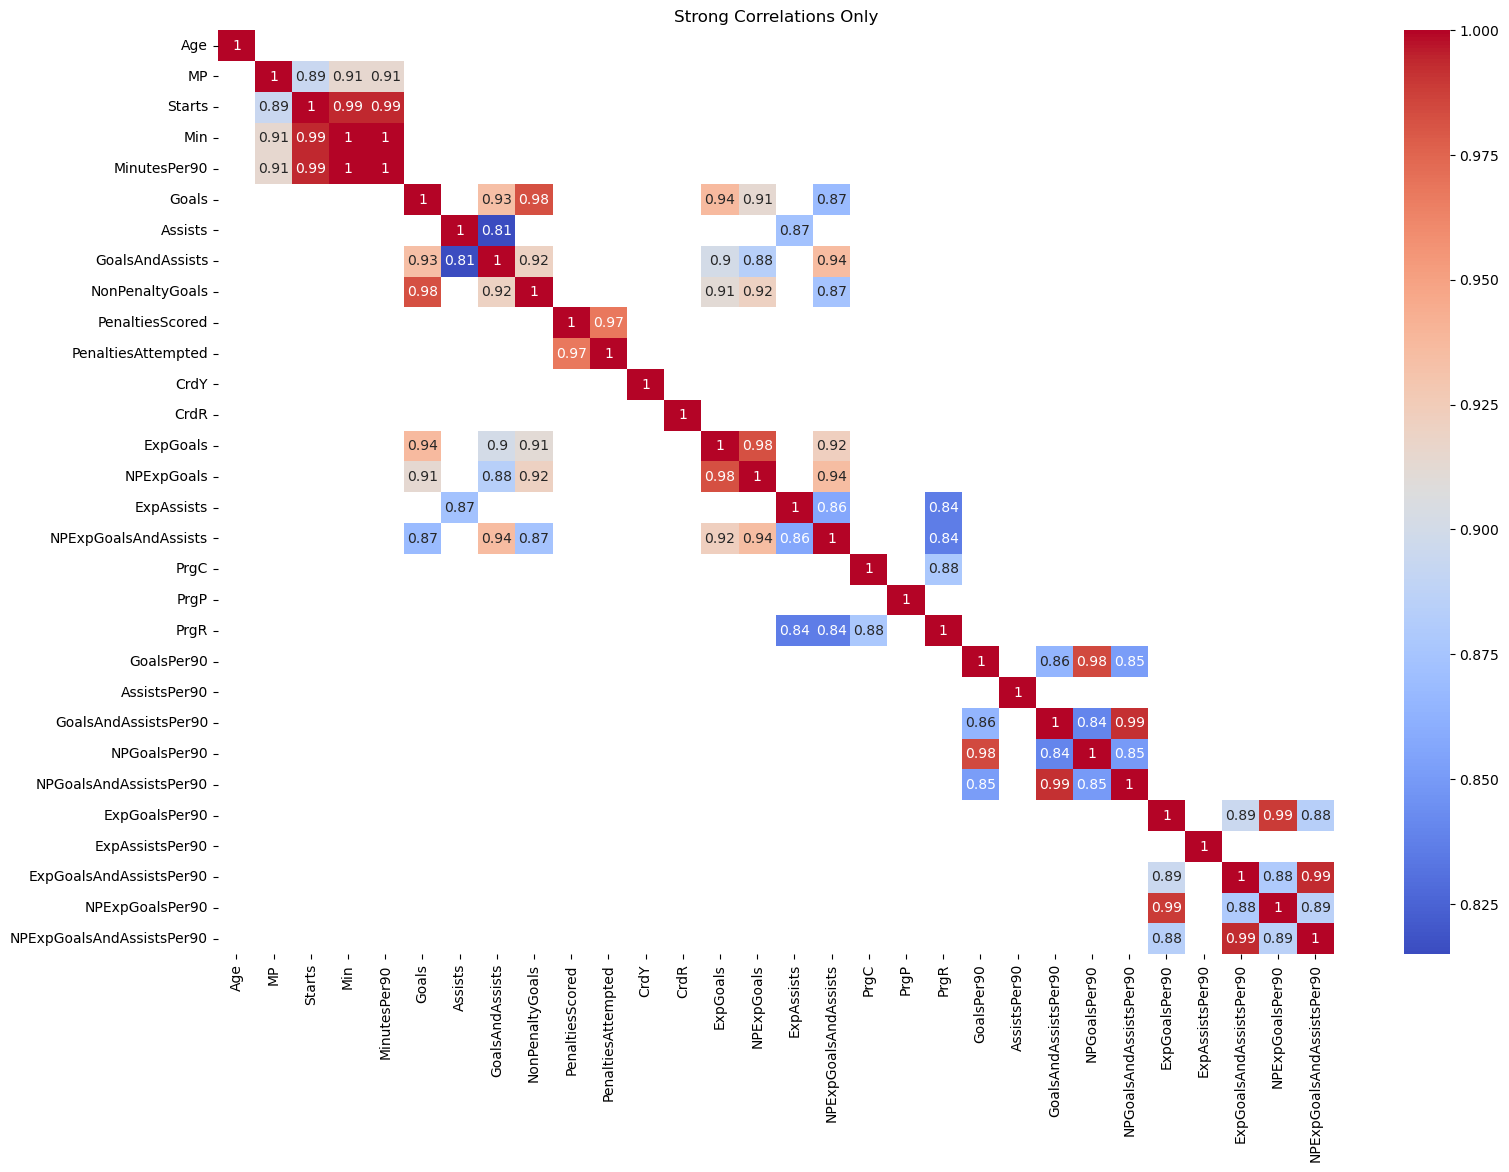

In [8]:
# Compute the correlation matrix for numeric columns
corr = df.corr(numeric_only=True)

# Filter to show only strong correlations (absolute value >= 0.8)
strong_corr = corr[(corr >= 0.8) | (corr <= -0.8)]

# Create a heatmap to visualize only the strong correlations
plt.figure(figsize=(18, 12))
sns.heatmap(strong_corr, annot=True, cmap='coolwarm', mask=strong_corr.isnull())

# Add a title to the heatmap
plt.title('Strong Correlations Only')
plt.show()


<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8" />
  <title>Football Performance Insights (2024-25) Season From Top 5 League</title>
  <style>
    body {
      margin: 0;
      padding: 40px 20px;
      font-family: 'Segoe UI', Tahoma, sans-serif;
      background-color: #f9fbfc;
      color: #2c3e50;
      line-height: 1.6;
      max-width: 900px;
      margin-left: auto;
      margin-right: auto;
    }

    h1 {
      font-size: 28px;
      text-align: center;
      color: #1a5276;
      margin-bottom: 40px;
    }

    .section {
      background-color: #ffffff;
      padding: 20px 25px;
      border-left: 6px solid #3498db;
      border-radius: 8px;
      margin-bottom: 20px;
      box-shadow: 0 4px 10px rgba(0, 0, 0, 0.03);
    }

    .section h2 {
      margin-top: 0;
      font-size: 18px;
      color: #2c3e50;
    }

    .section p {
      margin: 0;
      font-size: 15px;
      color: #555f6b;
    }

    .badge {
      display: inline-block;
      background-color: #3498db;
      color: white;
      font-size: 13px;
      font-weight: 600;
      padding: 2px 10px;
      border-radius: 20px;
      margin-right: 10px;
    }

    @media (max-width: 600px) {
      body {
        padding: 20px 12px;
      }
      .section {
        padding: 16px 20px;
      }
    }
  </style>
</head>
<body>

  <h1 style="
    font-family: 'Segoe UI', Tahoma, sans-serif;
    font-size: 36px;
    text-align: center;
    color: #1a5276;
    background: linear-gradient(90deg, #f2f6fc, #e0efff);
    padding: 20px 30px;
    border-radius: 12px;
    box-shadow: 0 6px 16px rgba(0, 0, 0, 0.1);
    margin: 30px auto;
    max-width: 800px;
">
  🏆 Football Performance Insights <br> <span style="font-size: 22px; color: #2c3e50;">(2024–25 Season) — Top 5 European Leagues</span>
</h1>


  <div class="section">
    <h2><span class="badge">1</span>Top 10 Goal Scorers</h2>
    <p>Who scored the most goals overall? </p>
  </div>

  <div class="section">
    <h2><span class="badge">2</span>Top Assist Providers</h2>
    <p>Highlighting the creative engines of each team with the most assists.</p>
  </div>

  <div class="section">
    <h2><span class="badge">3</span>Most Productive Players per 90 (min. 400 mins)</h2>
    <p>Measured by combined goals and assists per 90 minutes.</p>
  </div>

  <div class="section">
    <h2><span class="badge">4</span>Top 10 Efficient Players</h2>
    <p>Players who convert chances better than expected (Goals vs xG).</p>
  </div>

  <div class="section">
    <h2><span class="badge">5</span>Top 10 Progressive Playmakers</h2>
    <p>Who advanced the ball most through carries and passes (PrgP, PrgC, PrgR)?</p>
  </div>

  <div class="section">
    <h2><span class="badge">6</span>Top Penalty Takers</h2>
    <p>Most reliable from the spot, ranked by conversion rate (PenaltiesScored / PenaltiesAttempted).</p>
  </div>

  <div class="section">
    <h2><span class="badge">7</span>Top 10 Overperformers</h2>
    <p>Players who scored more goals than their expected goals (xG), showing clinical finishing.</p>
  </div>

  <div class="section">
    <h2><span class="badge">8</span>Top 10 Underperformers</h2>
    <p>Players who underachieved compared to their expected goals — missed chances and inefficiency.</p>
  </div>

  <div class="section">
    <h2><span class="badge">9</span>Top Young Talents (Age ≤ 21)</h2>
    <p>Breakout stars under 21 making an impact per 90 minutes (Goals + Assists).</p>
  </div>

  <div class="section">
    <h2><span class="badge">10</span>Most Matches Played</h2>
    <p>Players with the highest appearance count — fitness, consistency, and trust by the coach.</p>
  </div>

  <div class="section">
    <h2><span class="badge">11</span>Top 10 Players by Cards</h2>
    <p>Most yellow and red cards — aggressive or undisciplined players.</p>
  </div>

  <div class="section">
    <h2><span class="badge">12</span>Age vs Performance </h2>
    <p>Visualizing how age correlates with output (Goals, Assists per 90).</p>
  </div>

  <div class="section">
    <h2><span class="badge">13</span>Clinical Finishing by League: Goals vs Expected Goals</h2>
    <p>Comparing real vs expected goals to assess league-level finishing quality.</p>
  </div>

  <div class="section">
    <h2><span class="badge">14</span>League-wise U21 Talent</h2>
    <p>Which leagues nurture the most productive young talents under 21?</p>
  </div>

</body>
</html>


In [31]:
# Top 10 goal scorers
top_scorers = df[['Player', 'Goals','Squad']].sort_values(by='Goals', ascending=False).head(10)

#  horizontal bar chart with reversed y-axis
fig = px.bar(
    top_scorers,
    x='Goals',
    y='Player',
    orientation='h',
    title='Top 10 Goal Scorers',
    color='Squad',
    color_continuous_scale='Turbo',
)

# Show highest assist provider at the top
fig.update_layout(yaxis=dict(autorange="reversed"))

fig.show()

In [10]:
# Top Assist Provider 
top_assists = df[['Player', 'Assists','Squad']].sort_values(by='Assists', ascending=False).head(10)

fig = px.bar(
    top_assists,
    x='Assists',
    y='Player',
    orientation='h',
    title='Top 10 Assist Providers',
    color='Squad',
    color_continuous_scale='Plasma'  
)

# Show highest assist provider at the top
fig.update_layout(yaxis=dict(autorange="reversed"))

fig.show()


In [11]:
# Filter players with at least 500 minutes played
filtered_df = df[df['Min'] >= 500]  

# Top 10 Most Productive Players per 90 Minutes (Min 500 Minutes Played)
productive = filtered_df[['Player', 'GoalsAndAssistsPer90','Squad']].sort_values(by='GoalsAndAssistsPer90', ascending=False).head(10)

fig = px.bar(
    productive,
    x='GoalsAndAssistsPer90',
    y='Player',
    orientation='h',
    title='Top 10 Most Productive Players per 90 Minutes (Min 500 Minutes Played)',
    color='Squad',
    color_continuous_scale='Viridis'
)

# Showing most productive player at the top
fig.update_layout(yaxis=dict(autorange="reversed"))

fig.show()


In [12]:
# top 10 efficient players 
efficient = df[df['MinutesPer90'] >= 10][['Player', 'GoalsPer90', 'ExpGoalsPer90']] \
    .sort_values(by='GoalsPer90', ascending=False).head(10)

# Create interactive scatter plot
fig = px.scatter(
    efficient,
    x='ExpGoalsPer90',
    y='GoalsPer90',
    text='Player',  
    color='Player',  
    title='Efficiency: Goals per 90 vs Expected Goals per 90',
    size='GoalsPer90',  
    template='plotly_dark',
)

# Improve layout
fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))
fig.update_layout(
    xaxis_title='Expected Goals per 90',
    yaxis_title='Actual Goals per 90',
    legend_title_text='Player',
)

fig.show()

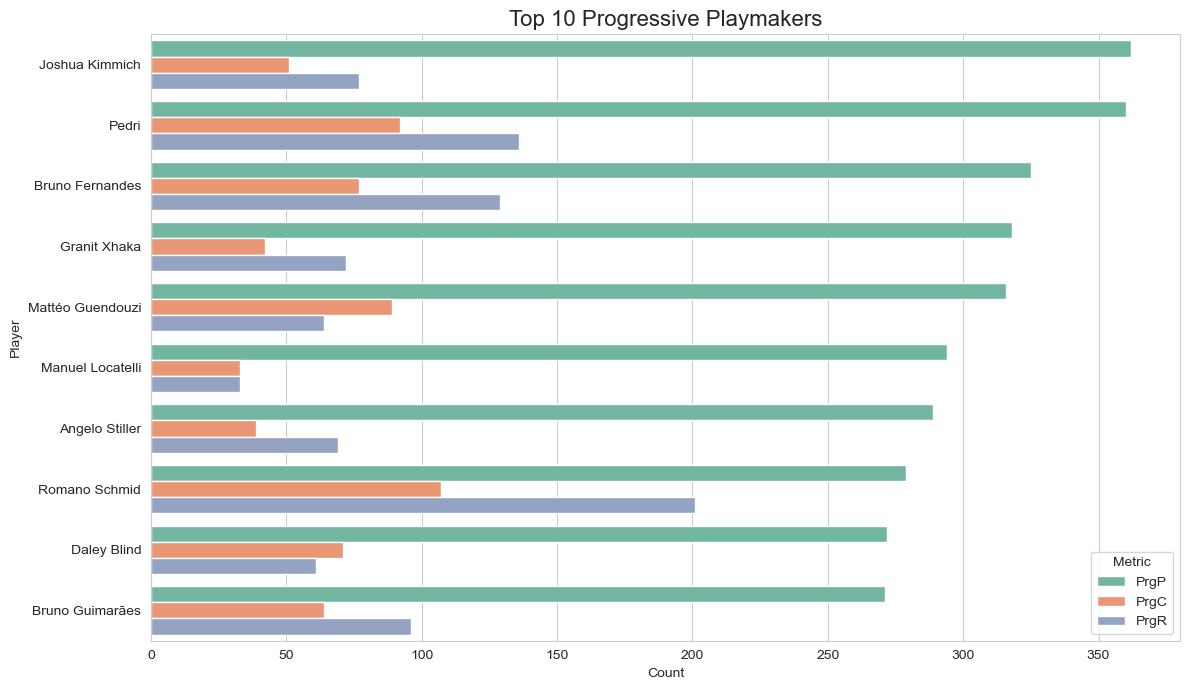

In [13]:


#  Progressive Playmakers 
# Select top 10 players sorted by progressive passes (PrgP)
progress = df[['Player', 'PrgP', 'PrgC', 'PrgR']].sort_values(by='PrgP', ascending=False).head(10)

# Melt the dataframe for grouped bar plotting
progress_melted = progress.melt(id_vars='Player', var_name='Metric', value_name='Value')

# plot style and figure size
sns.set_style('whitegrid')
plt.figure(figsize=(12, 7))

# Create grouped horizontal barplot for progressive metrics
sns.barplot(data=progress_melted, x='Value', y='Player', hue='Metric', palette='Set2')

# plot title and layout adjustments
plt.title('Top 10 Progressive Playmakers', fontsize=16)
plt.xlabel('Count')
plt.ylabel('Player')
plt.legend(title='Metric', loc='lower right')
plt.tight_layout()

plt.show()


In [14]:
# Calculate penalty conversion rate as a percentage
df['PenaltyConversionRate'] = (df['PenaltiesScored'] / df['PenaltiesAttempted']) * 100

# Top 10 Penalty Takers by Conversion Rate (%)
penalty = df[df['PenaltiesAttempted'] >= 5].sort_values(by='PenaltyConversionRate', ascending=False).head(10)

# Plot horizontal bar chart showing top penalty takers by conversion rate
fig = px.bar(
    penalty,
    x='PenaltyConversionRate',
    y='Player',
    orientation='h',
    title='Top Penalty Takers by Conversion Rate (%)',
    color='PenaltyConversionRate',
    color_continuous_scale='Plasma',
    hover_data=['Squad']
)

#  showing highest conversion rate on top
fig.update_layout(yaxis=dict(autorange='reversed'))

fig.show()


In [16]:
# Calculate underperformance (players whose actual goals < expected goals)
df['Underperformance'] = df['Goals'] - df['ExpGoals']

# Filter players who underperformed and get top 10 (most negative values)
underperformers = df[df['Underperformance'] < 0][
    ['Player', 'Squad', 'Goals', 'ExpGoals', 'Underperformance']
].sort_values(by='Underperformance').head(10)

# Plot the data using Plotly bar chart
fig = px.bar(
    underperformers,
    x='Underperformance',
    y='Player',
    color='Squad',
    orientation='h',
    title='Top 10 Underperformers (Goals vs Expected Goals)',
    template='plotly_dark',
    text='Underperformance'
)

# Customize layout
fig.update_layout(
    yaxis=dict(autorange='reversed'),  
    xaxis_title='Goals - Expected Goals',
    yaxis_title='Player'
)

# Step 5: Show the chart
fig.show()


In [34]:
#  Young Talents 
# Filter players age 21 or younger with at least 10 Minutes per 90
young = df[(df['Age'] <= 21) & (df['MinutesPer90'] >= 20)][['Player', 'Age','Squad', 'GoalsAndAssistsPer90']]\
    .sort_values(by='GoalsAndAssistsPer90', ascending=False).head(10)

fig= px.bar(
    young,
    x='GoalsAndAssistsPer90',
    y='Player',
    hover_data=['Age'],
    orientation='h',
    color='Squad',
    title='Top 10 Young Talents (Age ≤ 21)',
    color_continuous_scale='Viridis',
)

# show top talent on top
fig.update_layout(yaxis=dict(autorange='reversed'))

fig.show()


In [33]:
# Filter out goalkeepers because if gk is not filter out all of the 10 player are gk
non_gk_df = df[df['Pos'] != 'GK']

#top 10 non-GK players by minutes played
top_minutes = non_gk_df[['Player', 'Min', 'Squad']].sort_values(by='Min', ascending=False).head(10)

fig = px.bar(
    top_minutes,
    x='Min',
    y='Player',
    orientation='h',
    color='Min',
    title='Top 10 Non-GK Players with Most Minutes Played',
    template='plotly_dark',
    text='Min',
    hover_data=['Squad']
)

fig.update_layout(
    yaxis=dict(autorange='reversed'),
    xaxis_title='Minutes Played',
    yaxis_title='Player'
)

fig.show()


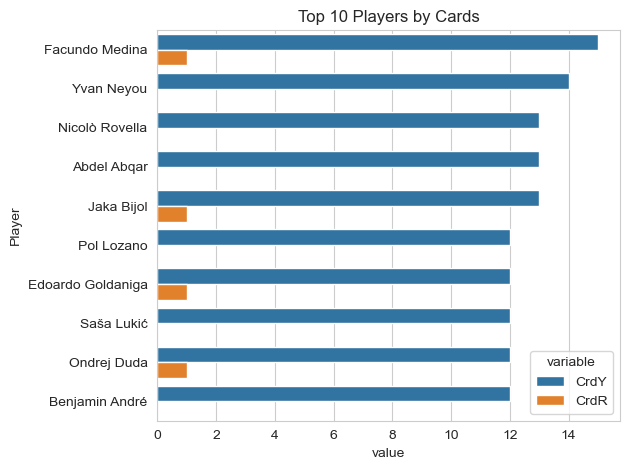

In [19]:
#  Disciplinary Issues
cards = df[['Player', 'CrdY', 'CrdR']].sort_values(by='CrdY', ascending=False).head(10)
cards_melted = cards.melt(id_vars='Player')
sns.barplot(data=cards_melted, x='value', y='Player', hue='variable')
plt.title('Top 10 Players by Cards')
plt.tight_layout()
plt.show()

In [35]:
# Create a scatter plot to analyze Age vs Performance (Goals + Assists per 90 mins)
fig = px.scatter(
    df[df['MinutesPer90'] >= 10],  
    x='Age',                       
    y='GoalsAndAssistsPer90',      
    hover_name='Player',           
    color='Squad',                 
    size='GoalsAndAssistsPer90',  
    title='Age vs Performance (Goals + Assists per 90)', 
    template='plotly_dark'         
)

# Update layout for better axis labeling
fig.update_layout(
    xaxis_title='Age',                               
    yaxis_title='Goals + Assists per 90',            
)

# Display the interactive scatter plot
fig.show()

In [29]:


league_avg = df.groupby('Comp')[['GoalsPer90', 'ExpGoalsPer90', 'AssistsPer90']].mean().reset_index()

fig = px.scatter(
    league_avg,
    x='ExpGoalsPer90',
    y='GoalsPer90',
    size='AssistsPer90',
    color='Comp',
    text='Comp',
    title='Turning Chances into Goals: League Finishing Efficiency (Goals Vs Expected Goals)',
    template='plotly_dark'
)

fig.update_traces(textposition='top center')
fig.update_layout(xaxis_title='Expected Goals per 90', yaxis_title='Actual Goals per 90')
fig.show()


In [22]:
u21_talents = df[(df['Age'] <= 21) & (df['GoalsAndAssistsPer90'] >= 0.3)]
u21_by_league = u21_talents['Comp'].value_counts().reset_index()
u21_by_league.columns = ['League', 'U21_Talents']

fig = px.pie(
    u21_by_league,
    values='U21_Talents',
    names='League',
    title='League-wise U21 Talent Share',
    template='plotly_dark'
)
fig.show()
